<a href="https://colab.research.google.com/github/LaizaCostaa/Customer_segmentation_k-means/blob/main/customer_segmentation_k_means_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. **IMPORTANDO AS BIBLIOTECAS**

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))

**2. ANÁLISE EXPLORATÓRIA**

In [134]:
df = pd.read_csv('mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [135]:
df.shape

(200, 5)

In [136]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [137]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [138]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [139]:
plt.style.use('fivethirtyeight')

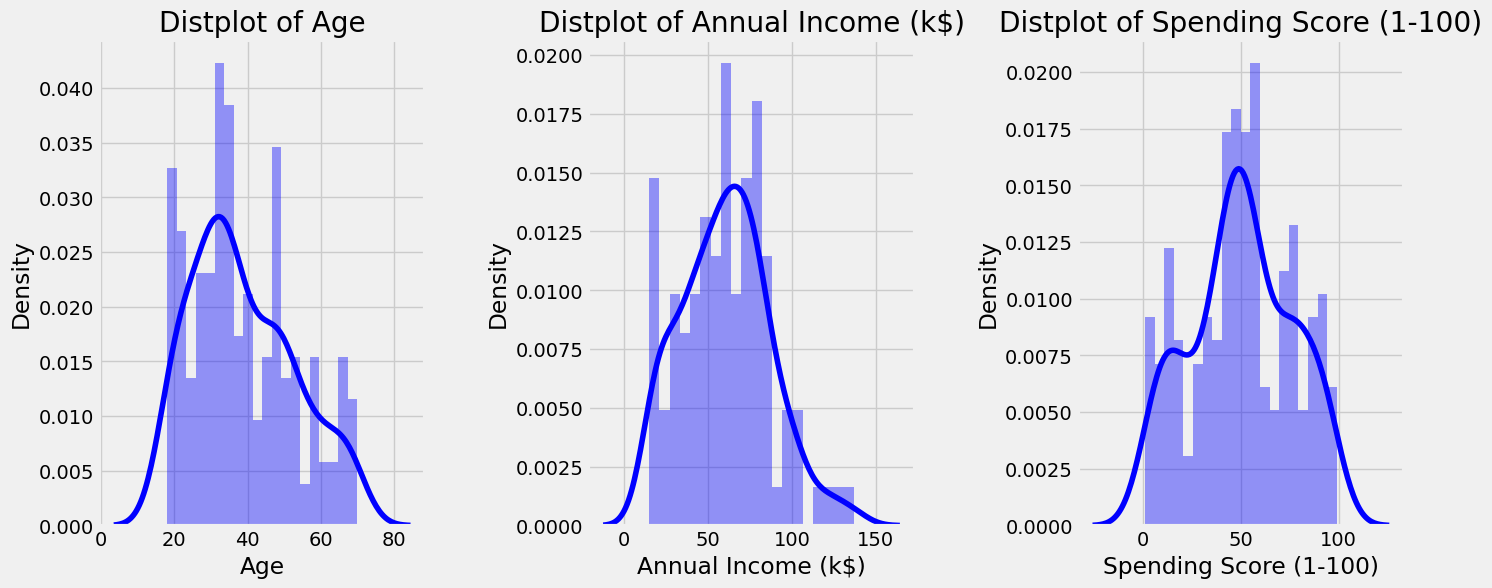

In [140]:
plt.figure(figsize=(15, 6))

variables = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i, var in enumerate(variables, 1):
    plt.subplot(1, 3, i)
    sns.distplot(df[var], bins=20, color='blue')
    plt.title('Distplot of {}'.format(var))
    plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.show()

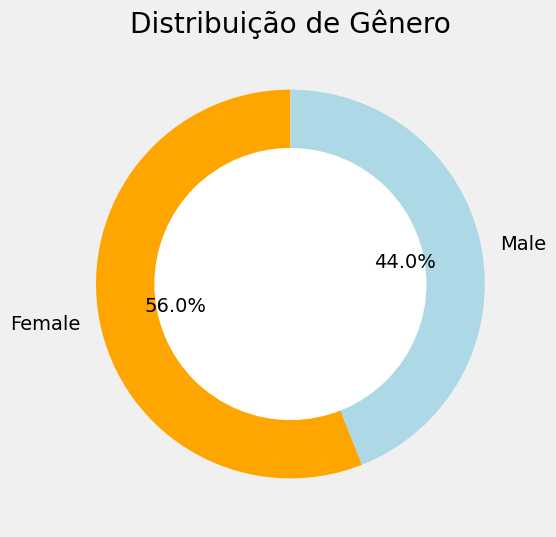

In [141]:

# Counplot of gender
gender_counts = df['Gender'].value_counts()


plt.figure(figsize=(10, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['orange', 'lightblue'], startangle=90)


centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribuição de Gênero')


plt.show()

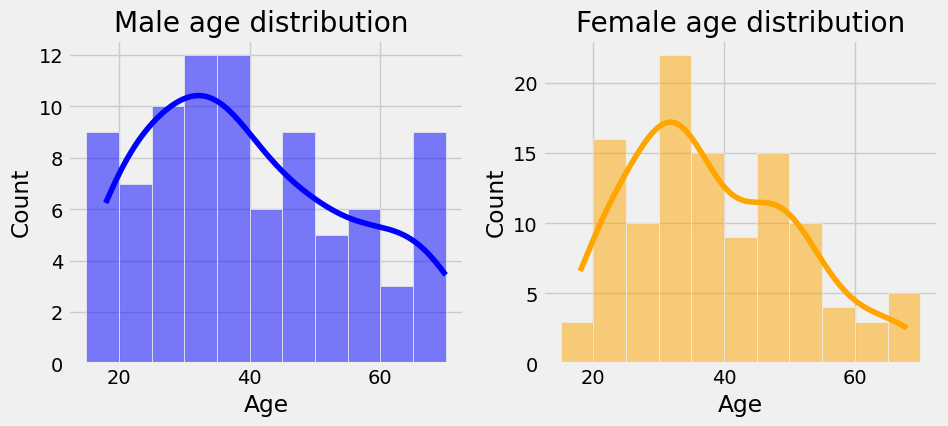

In [142]:
# Distribution of age by gender
male = df[df.Gender == "Male"]["Age"]
female = df[df.Gender != "Male"]['Age']

plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.histplot(male, color='blue', bins = range(15,75,5), kde = True)
plt.title("Male age distribution ")

plt.subplot(1,2,2)
sns.histplot(female, color = 'orange', bins = range(15,75,5), kde = True)
plt.title("Female age distribution");

plt.show()

In [143]:
df.groupby('Gender').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


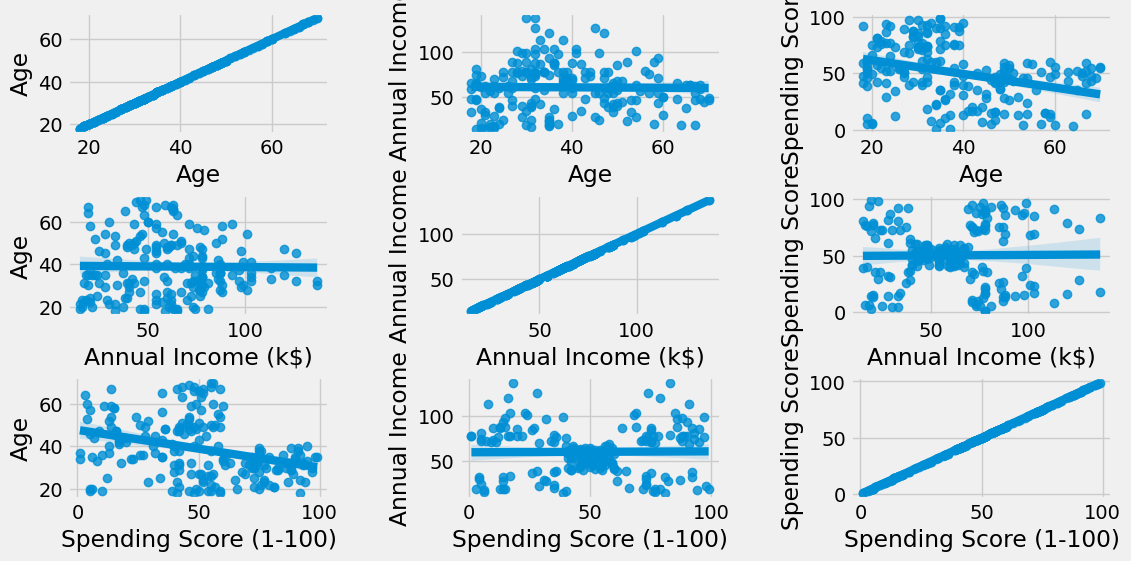

In [144]:
plt.figure(1 , figsize = (12 , 6))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

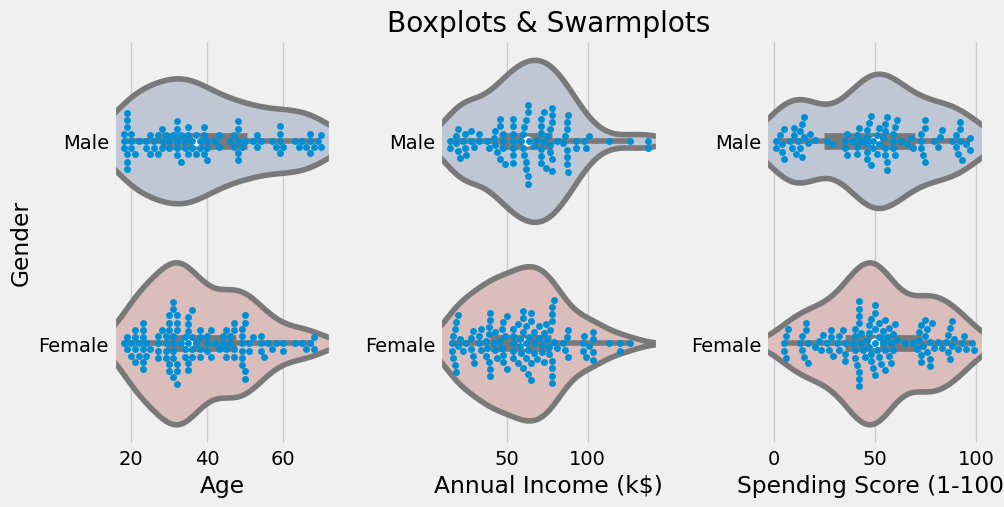

In [145]:

plt.figure(1 , figsize = (10, 5))
n = 0
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

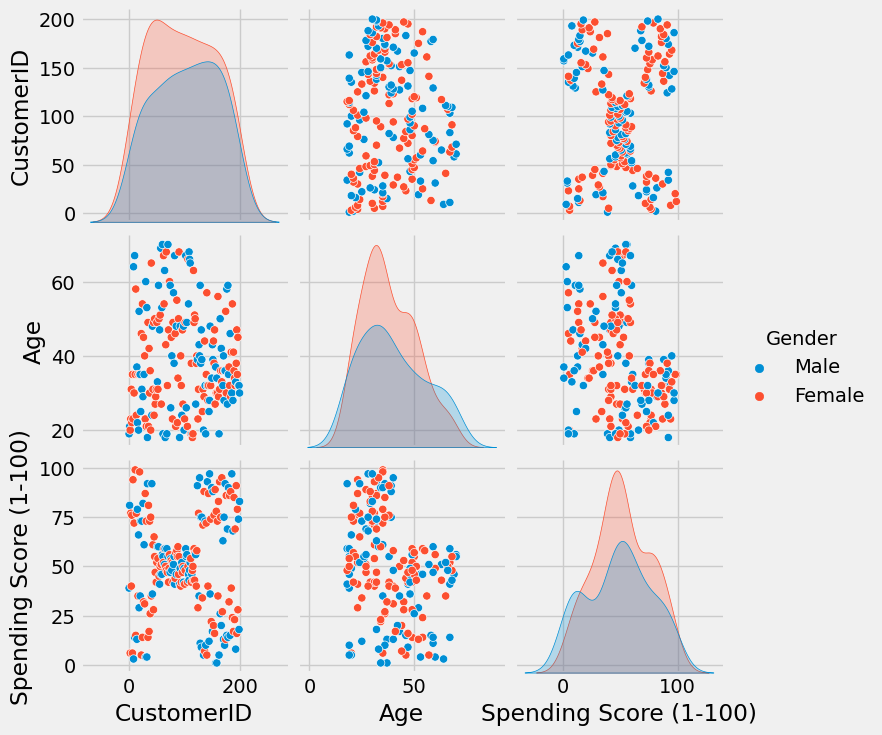

In [146]:
sns.pairplot(df.drop("Annual Income (k$)", axis = 1), hue = "Gender");

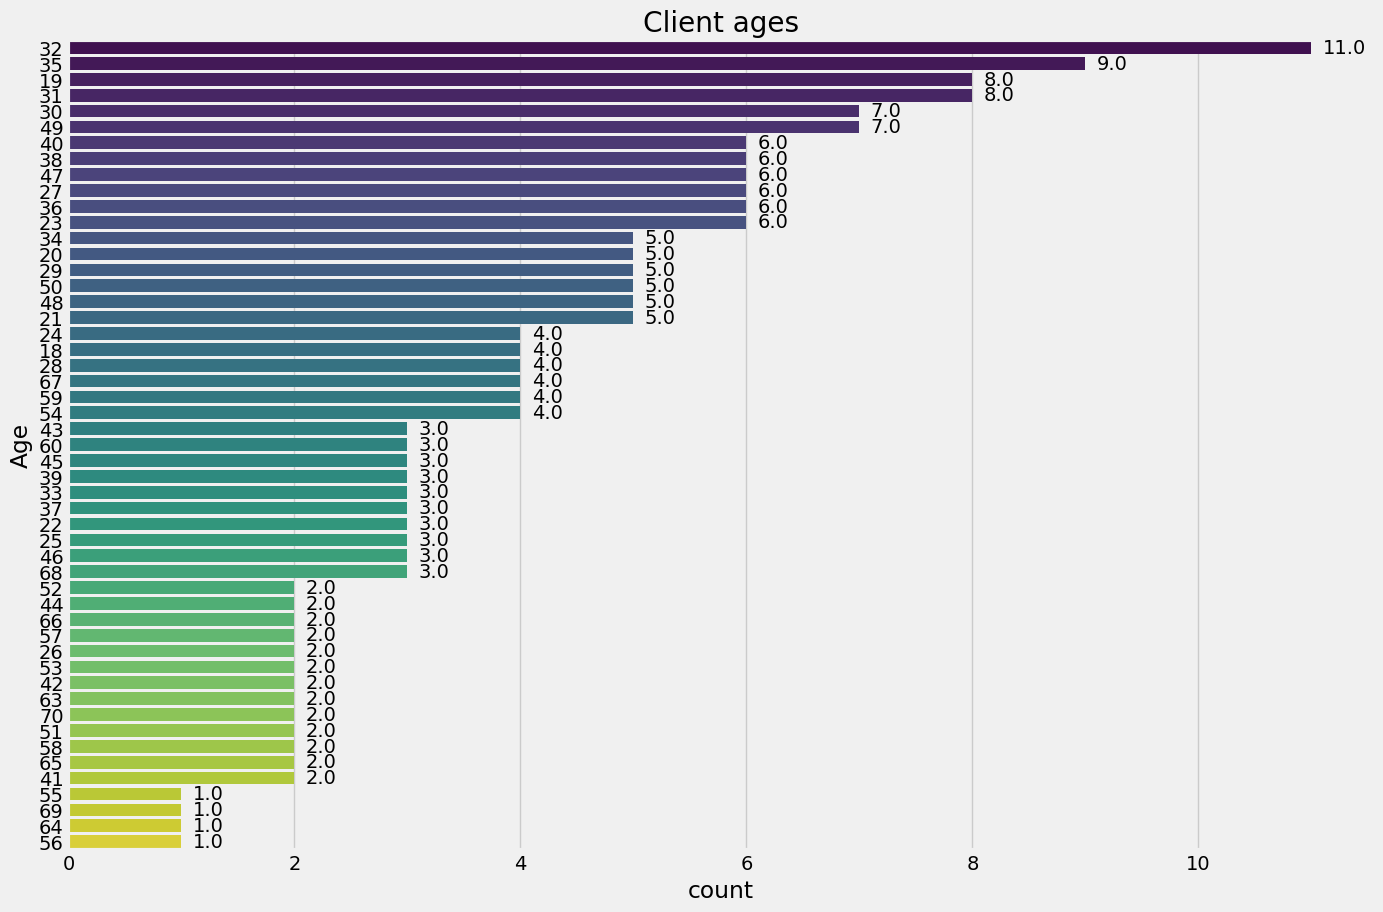

In [147]:
plt.figure(figsize=(15, 10))

# "Creating the bar chart sorting by count
ax = sns.countplot(y='Age', data=df, order=df['Age'].value_counts().index, palette='viridis')

# putting values on bars
for p in ax.patches:
    ax.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2, f'{p.get_width()}', ha='left', va='center')


plt.title('Client ages')


plt.show()

In [148]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

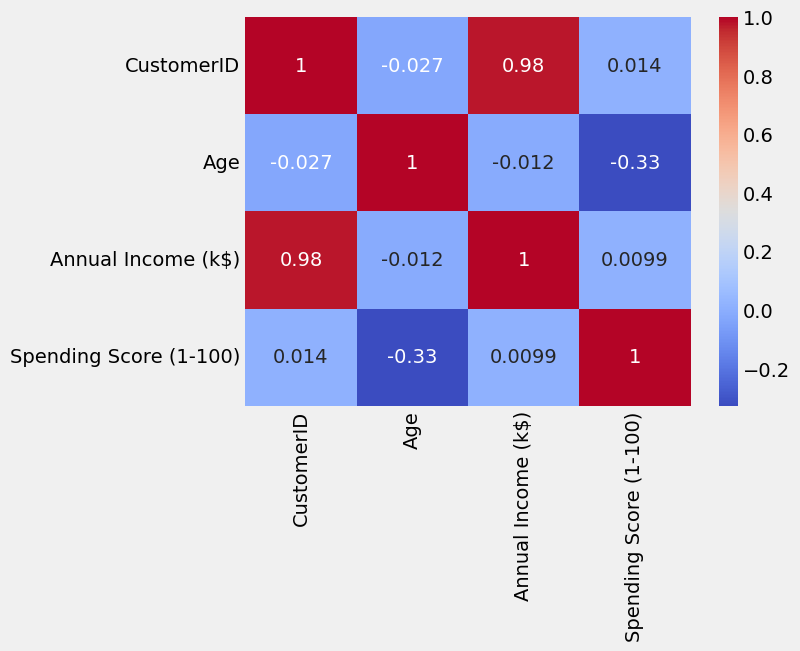

In [149]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')



1.   A correlação entre "Age" e "annual_income" diminui conforme a idade aumenta.



In [150]:
df['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

Descrição da idade dos clientes:


A maioria dos clientes possui em torno de 49 anos, e a média pe 38. Ou seja, boa parte dos clientes são adultos de meia idade ou idosos. Apenas 25% dos clientes possuem menos de 30 anos.

3. **APLICANDO O MODELO K-MEANS**

*3.2. Segmentação de clientes com as variáveis "age" e "spending_score"*

In [151]:
clustering_age_spending = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(clustering_age_spending)
    inertia.append(algorithm.inertia_)

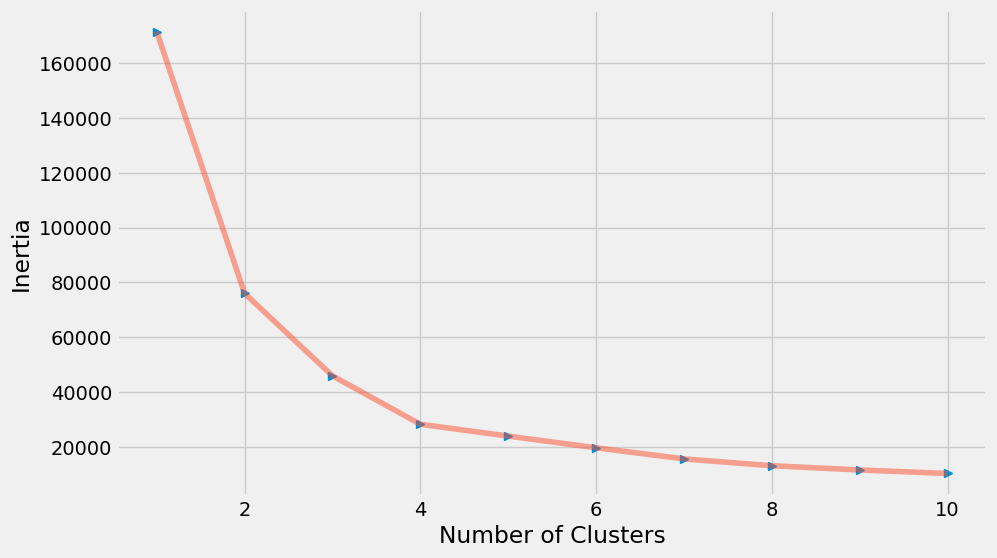

In [152]:
plt.figure(1 , figsize = (10 ,6))
plt.plot(np.arange(1 , 11) , inertia , '>')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [153]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=800,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(clustering_age_spending)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [154]:
#Meshgrid

h = 0.02
x_min, x_max = clustering_age_spending[:, 0].min() - 1, clustering_age_spending[:, 0].max() + 1
y_min, y_max = clustering_age_spending[:, 1].min() - 1, clustering_age_spending[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

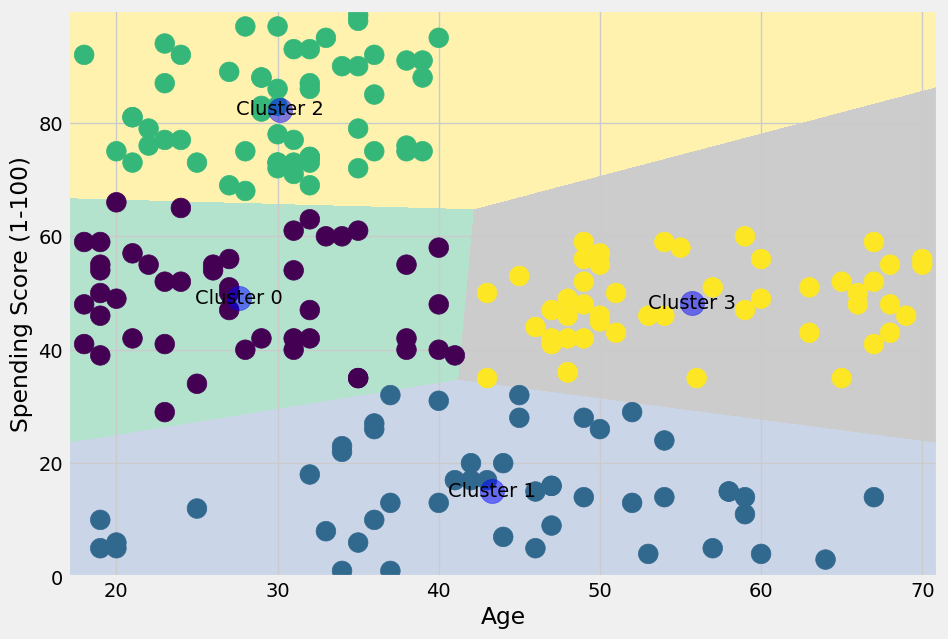

In [155]:
plt.figure(1, figsize=(10, 7))
plt.clf()

Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Pastel2, aspect='auto', origin='lower')

plt.scatter(x='Age', y='Spending Score (1-100)', data=df, c=labels1, s=200)

# labeling the clusters
for cluster_label, centroid in enumerate(centroids1):
    plt.scatter(x=centroid[0], y=centroid[1], s=300, c='blue', alpha=0.5)
    plt.text(centroid[0], centroid[1], f'Cluster {cluster_label}', fontsize=14, color='black', ha='center', va='center')

plt.ylabel('Spending Score (1-100)'), plt.xlabel('Age')
plt.show()

In [156]:
from sklearn.metrics import silhouette_score

In [157]:
# Evaluation  4 clusters
algorithm_4 = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=800, tol=0.0001, random_state=111, algorithm='elkan')
algorithm_4.fit(clustering_age_spending)
labels_4 = algorithm_4.labels_
silhouette_avg_4 = silhouette_score(clustering_age_spending, labels_4)
print(f'Silhouette Score para 4 clusters: {silhouette_avg_4}')

# Evaluation 5 clusters
algorithm_5 = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=800, tol=0.0001, random_state=111, algorithm='elkan')
algorithm_5.fit(clustering_age_spending)
labels_5 = algorithm_5.labels_
silhouette_avg_5 = silhouette_score(clustering_age_spending, labels_5)
print(f'Silhouette Score para 5 clusters: {silhouette_avg_5}')

Silhouette Score para 4 clusters: 0.49973941540141753
Silhouette Score para 5 clusters: 0.44182051662319294


*Distribuição dos clusters:*

cluster 0: clientes entre 18-40 anos - > gasto médio;

Cluster 1: clientes entre 30-60 anos -> Gasto baixo;

Cluster 2: Clientes entre 20-40 anos -> Gasto alto;

Cluster 3: Clientes entre 40-70 anos -> Gasto médio;


-----------------------------------------------------------------


De acordo com a distribuição dos clusters, os grupos de clientes mais jovens tem uma leve tendência a gastar mais (gasto médio/alto), enquanto os públicos de meia idade e idosos uma tendência a gastar um pouco menos (gasto médio/baixo). Entretanto, é preciso considerar que a maior parte dos clientes é representada pelo público de meia idade. ainda precisamos analisar com mais cuidado as outras variáveis, como "annual_income" e "spending_score". Acredito que a relação renda e gastos (annual_income e spending_score) consiga trazer mais respostas.



*3.3 Segmentação de clientes com as variáveis "annual_income" e "spending_score" **texto em negrito*

In [158]:
clustering_income_spending = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Escolhe o número de clusters desejado
num_clusters = 5

# Aplica o algoritmo KMeans
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='elkan')
df['Income Cluster'] = kmeans.fit_predict(clustering_income_spending)

In [159]:

clustering_income_spending = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(clustering_income_spending)
    inertia.append(algorithm.inertia_)


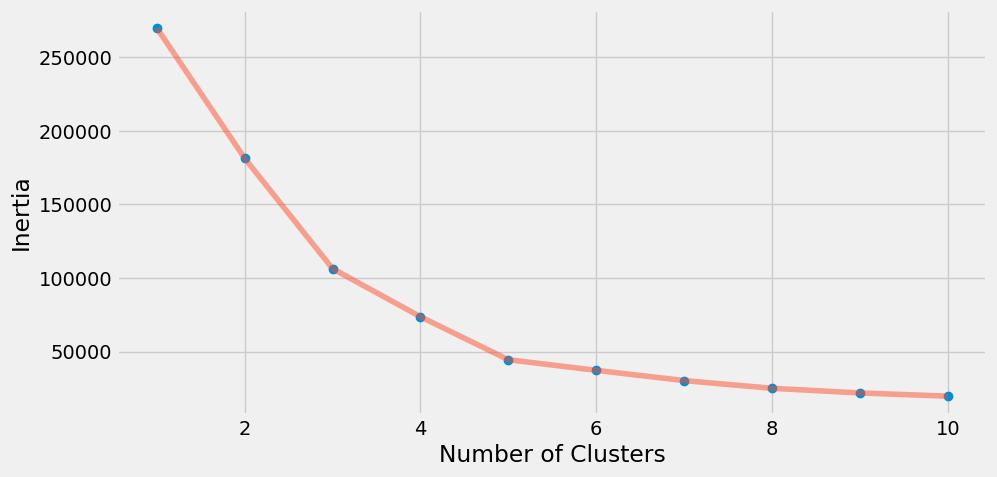

In [160]:
plt.figure(1 , figsize = (10 ,5))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [161]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(clustering_income_spending)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [162]:
#meshgrid
h = 0.02
x_min, x_max = clustering_income_spending[:, 0].min() - 1, clustering_income_spending[:, 0].max() + 1
y_min, y_max = clustering_income_spending[:, 1].min() - 1, clustering_income_spending[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

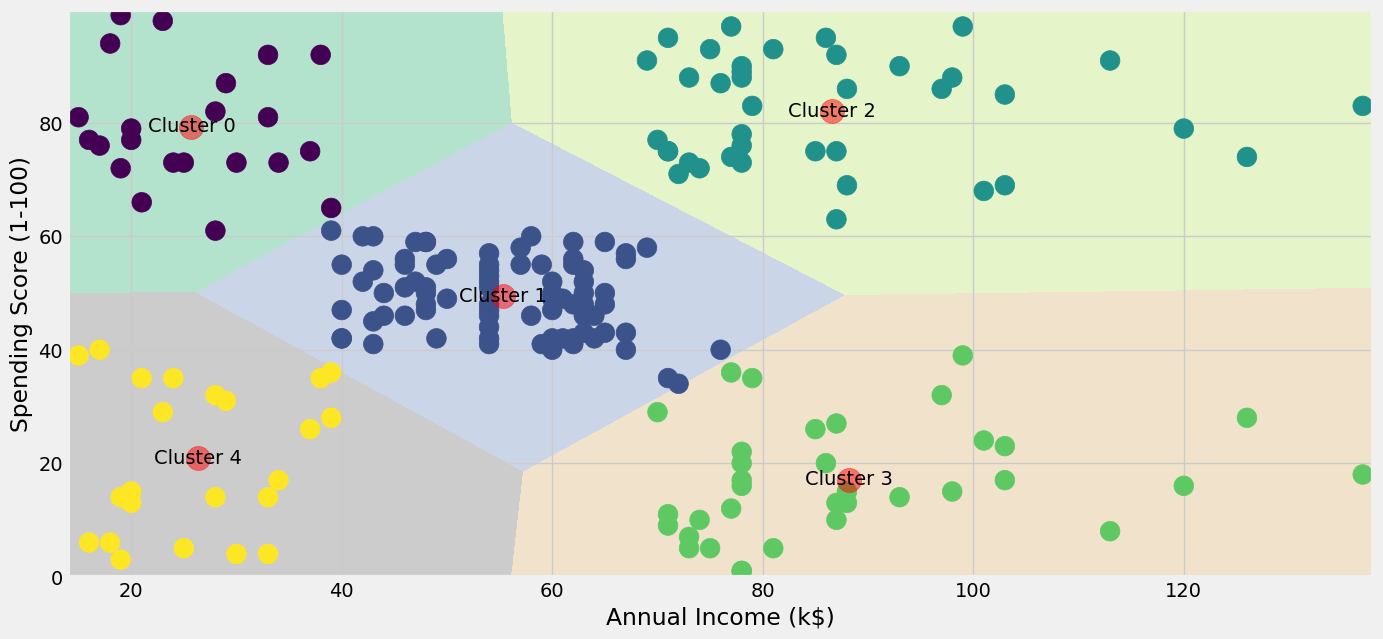

In [163]:
plt.figure(1, figsize=(15, 7))
plt.clf()

Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Pastel2, aspect='auto', origin='lower')

plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, c=labels2, s=200)

# Adding labels to the clusters
for cluster_label, centroid in enumerate(centroids2):
    cluster_points = df[labels2 == cluster_label]
    cluster_center = centroid
    plt.scatter(x=cluster_center[0], y=cluster_center[1], s=300, c='red', alpha=0.5)

    # Calculating the mean point of cluster and then labeling
    mid_point = cluster_points[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

    plt.text(mid_point[0], mid_point[1], f'Cluster {cluster_label}', fontsize=14, color='black', ha='center', va='center')

plt.ylabel('Spending Score (1-100)'), plt.xlabel('Annual Income (k$)')
plt.show()

In [164]:
# Calculating Silhouette Score
silhouette_avg = silhouette_score(clustering_income_spending, labels2)

print(f'O Silhouette Score para os clusters é: {silhouette_avg}')


O Silhouette Score para os clusters é: 0.553931997444648




* *Cluster 0* - Clientes com renda anual baixa e gastos anuais altos:

    Estes clientes têm uma renda anual baixa, mas gastam bastante.
    Pode ser um segmento interessante para produtos ou serviços acessíveis, focados em orçamentos mais apertados.

    -----------------------------------------------------------------------

* *Cluster 1* - Clientes com renda anual média e gastos anuais médios:

    Pode haver oportunidades para upselling ou cross-selling para aumentar os gastos desses clientes.

    ----------------------------------------------------------------------------

* *Cluster 2* - Clientes com renda anual alta e gastos anuais altos:

    Esse pode ser o nosso target customer. Pode ser um segmento premium que valoriza produtos ou serviços exclusivos e de alta qualidade.Estratégias de marketing podem incluir ofertas personalizadas, experiências exclusivas ou programas de recompensas de luxo.

    ----------------------------------------------------------------------------

* *Cluster 3* - Clientes com renda anual alta, mas gastos anuais baixos:

    Pode ser um desafio envolver esses clientes, e as estratégias podem envolver a compreensão das razões por trás de seus baixos gastos e ajustar as ofertas em conformidade.

    ----------------------------------------------------------------------------

* *Cluster 4 *- Clientes com renda anual baixa, mas gastos anuais médios:

    Estratégias de marketing podem envolver a oferta de produtos ou serviços acessíveis, adaptados ao orçamento desses clientes.Pode ser importante criar promoções específicas e programas de fidelidade para manter esses clientes engajados.



* Em síntese:**
    As propostas de marketing devem criar oportunidades de engajar cada
    público de acordo com suas particularidades. Entretanto, as análises anteriores apontam que boa parte dos clientes é representado pelo público de meia idade. Dessa forma, pode ser que o público de meia idade com renda alta e gastos altos represente um perfil bastante promissor.

4. **OUTRAS ANÁLISES**

In [168]:
algorithm5 = KMeans(n_clusters=5)
algorithm5.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =algorithm5.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,4,0
1,2,Male,21,15,81,0,2
2,3,Female,20,16,6,4,0
3,4,Female,23,16,77,0,2
4,5,Female,31,17,40,4,0


In [169]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.608696,0.391304
1,0.538462,0.461538
2,0.590909,0.409091
3,0.592593,0.407407
4,0.457143,0.542857


In [170]:
algorithm5 = KMeans(n_clusters=5)
algorithm5.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =algorithm5.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,4,0
1,2,Male,21,15,81,0,3
2,3,Female,20,16,6,4,0
3,4,Female,23,16,77,0,3
4,5,Female,31,17,40,4,0


In [171]:
#Multivariate clustering

from sklearn.preprocessing import StandardScaler

In [172]:
scale = StandardScaler()

In [173]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,4,0
1,2,Male,21,15,81,0,3
2,3,Female,20,16,6,4,0
3,4,Female,23,16,77,0,3
4,5,Female,31,17,40,4,0


In [174]:
#aplying One-Hot Encoding to transform categorical variables

dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,4,0,1
1,2,21,15,81,0,3,1
2,3,20,16,6,4,0,0
3,4,23,16,77,0,3,0
4,5,31,17,40,4,0,0


In [175]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [176]:
dff = scale.fit_transform(dff)

In [177]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


In [178]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,4,0
1,2,Male,21,15,81,0,3
2,3,Female,20,16,6,4,0
3,4,Female,23,16,77,0,3
4,5,Female,31,17,40,4,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,1
196,197,Female,45,126,28,3,4
197,198,Male,32,126,74,2,1
198,199,Male,32,137,18,3,4
